In [155]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('AssignmentForReg&Classification.csv')
dataset= dataset.iloc[:,0:13]
dataset

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab  
0    -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  
1    -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957  
2    -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  
3    -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  
4    -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  
...        ...       ...       ...       ...       ...       ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263  

[10000 rows x 13 columns]

In [156]:
#splitting into independent and dependent 
x= dataset.iloc[:,0:12].values
y=dataset.iloc[:,12].values

In [157]:
#splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)
len(x_train)

7500

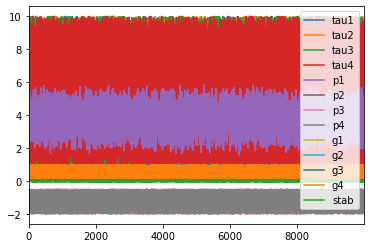

In [158]:
#visulaize the code
import matplotlib.pyplot as plt 
dataset.plot()

In [161]:
#Polynomial Fit since data is  not linear seperable
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
linear=LinearRegression()
polyObj=PolynomialFeatures(degree=4)
x_poly=polyObj.fit_transform(x_train)
linear.fit(x_poly,y_train)
linear.score(x_poly,y_train)
# lin2 = LinearRegression()

0.9734028826556808

In [163]:
#testing the Polynomial Model
x_testPoly=polyObj.fit_transform(x_test)
linear.score(x_testPoly,y_test)

0.9550004502507508

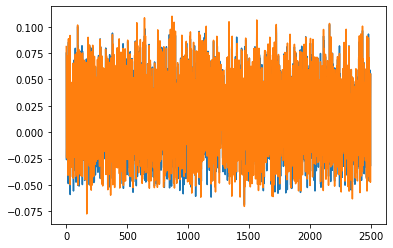

In [164]:
#Plotting the tested Value and Predicted Value
newY=linear.predict(x_testPoly)
plt.plot(y_test,label="y_test")
plt.plot(newY,label="y_predicted")
plt.show()

In [165]:
#Making list of different RegressorModel and looping through it to find score of each model
from sklearn.ensemble import RandomForestRegressor
list=[DecisionTreeRegressor(),RandomForestRegressor()]
final=[]
for obj in list:
    scores={}
    obj.fit(x_train,y_train)
    scores['Score']=obj.score(x_test,y_test)
    final.append(scores)
print(final)

c:\users\chandano\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[{'Score': 0.7190333126554347}, {'Score': 0.8702225299559001}]
